<a href="https://colab.research.google.com/github/Swamy612/Lending-Club-Case-Study/blob/main/LENDING_CLUB_CASE_STUDY_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LENDING CLUB CASESTUDY

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# Notebook formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/loan.csv')

# data shape
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 39717 rows and 111 columns.


In [ ]:
# data sample
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Number of categorical and numerical features
num, obj = 0, 0
for cols in data.columns:
    if data[cols].dtype != 'O':
        num += 1
    else:
        obj += 1
print(f'There are {num} numerical and {obj} categorical columns.')

There are 87 numerical and 24 categorical columns.


(array([0, 1, 2]),
 [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off'), Text(2, 0, 'Current')])

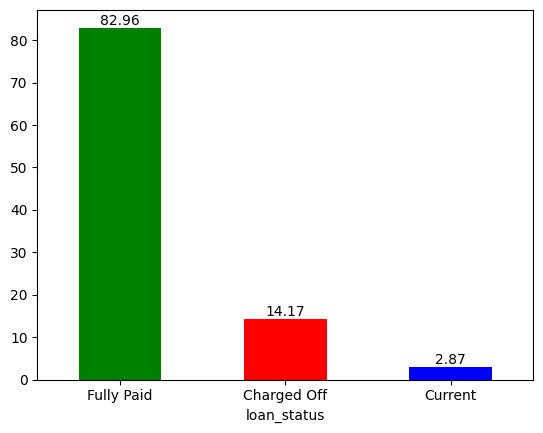

In [ ]:
# understanding the target columns
# ploting the graph
ax = round(data['loan_status'].value_counts(normalize=True)*100, 2).plot.bar(color=['green', 'red', 'blue'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)

OBSERVATION ON TARGET
* In this dataset, 82.9% are Fully Paid and 14.17% has Charged-Off and 2.87% are Current.
* Target has 0 missing values.
* Feature value "Current" can be removed since, it doesnot contribute to the analysis

In [ ]:
# Treatment on target based on the observation
print('Number of unique values in the data before treatment:')
print(round(data['loan_status'].value_counts(normalize=True)*100, 2))

# remove the data where attribute value is "Current"
data = data[data['loan_status'] != 'Current']

# proportion of data after treatment
print('\nNumber of unique values in the data after treatment:')
print(round(data['loan_status'].value_counts(normalize=True)*100, 2))

Number of unique values in the data before treatment:
loan_status
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: proportion, dtype: float64

Number of unique values in the data after treatment:
loan_status
Fully Paid     85.41
Charged Off    14.59
Name: proportion, dtype: float64


In [ ]:
# duplicate check
drows, dcols = data[data.duplicated()].shape
print('There are no duplicated in the data.' if drows==0 else f'There are {drows} duplicates in the data.')

There are no duplicated in the data.


In [ ]:
# missing value check

mv_grt30_lst = []  # list to store feature with more than 30% missing value
mv_lst30_lst = []  # list to store feature with less than 30% missing value

for feature in data.columns:
    if round(data[feature].isnull().mean()*100, 2) >= 30:
        mv_grt30_lst.append(feature)
    elif 0.0000 < (data[feature].isnull().mean()*100) <= 30:
        mv_lst30_lst.append(feature)

print(f'There are {len(mv_grt30_lst)} feature that has more than 30% missing values.')
print(f'There are {len(mv_lst30_lst)} feature that has less than 30% missing values.')

There are 58 feature that has more than 30% missing values.
There are 10 feature that has less than 30% missing values.


In [ ]:
# looping to find attribute with one unique value
ufeat_lst = []

for feature in data.columns:
    if data[feature].nunique() == 1:
        ufeat_lst.append(feature)

print(f'There are {len(ufeat_lst)} feature that has one unique value.')

There are 11 feature that has one unique value.


# OBSERVATION FROM THE DATA DICTIONARY

* Features such as **"id" , 'member_id', 'url'** has **entirely unique** value.
* Based on the description provided in **data dictionary**,
    * **title** - The loan title provided by the borrower.
    * **emp_title** - The job title supplied by the Borrower when applying for the loan.
    * **out_prncp_inv** - Remaining outstanding principal for portion of total amount funded by investors
    * **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application.
    * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
    * **total_rec_late_fee** - Late fees received to date.
    * **chargeoff_within_12_mths** - Number of charge-offs within 12 months.
    * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    * **last_pymnt_d** - Last month payment was received.
    * **revol_bal** - Total credit revolving balance.
    * **out_prncp** - Remaining outstanding principal for total amount funded.
    * **total_pymnt** - Payments received to date for total amount funded.
    * **total_rec_int** - Interest received to date.
    * **total_rec_prncp** - Principal received to date.    
    * **recoveries** - post charge off gross recovery.
    * **last_pymnt_amnt** - Last total payment amount received.
    * **collection_recovery_fee** - post charge off collection fee.
    * **collections_12_mths_ex_med** - Number of collections in 12 months excluding medical collections.
    * **tax_liens** - Number of tax liens.
    * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
    * **addr_state** - Average current balance of all accounts
* These **21 features has no contribution** to analysis by its nature since most of them are **derived post-approval** of loan.


* We are in the **pursuit to find the driving factors pre-approval** of loan that leads the customers to default. So, the **above mentioned features can be removed** for further analysis.

In [ ]:
# List of features to remove
rmv_lst = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d',
           'total_rec_late_fee', 'chargeoff_within_12_mths', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal',
           'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee',
           'last_pymnt_amnt','recoveries', 'collections_12_mths_ex_med', 'tax_liens','earliest_cr_line', 'addr_state']

# consolidated list for removal
removal_lst = list(set(mv_grt30_lst + ufeat_lst + rmv_lst))

# count of the features to be removed
print('Number of features to remove:', len(removal_lst))

# Count of columns before removing
print(f'Number of features before removing: {data.shape[1]}')

# removing the features from the dataframe
for feature in removal_lst:
    del data[feature]

# count of the features after removal
print('Number of features after removal:', data.shape[1])

Number of features to remove: 88
Number of features before removing: 111
Number of features after removal: 23


In [ ]:
# Data validation and data cleaning

# Dataframe for missing value & datatype
data_desc = pd.DataFrame({'Missing_Prop': round(data.isnull().mean()*100, 2),
                          'Datatype': data.dtypes})

# Dataframe for 2 sample values
sample_data = data.head(2).T

# Concat the above two dataframe
data_val = pd.concat([data_desc, sample_data], axis=1)
data_val.rename(columns={0: 'Sample_1',
                         1: 'Sample_2'}, inplace=True)

data_val

,Missing_Prop,Datatype,Sample_1,Sample_2
loan_amnt,0.00,int64,5000,2500
funded_amnt,0.00,int64,5000,2500
funded_amnt_inv,0.00,float64,4975.0,2500.0
term,0.00,object,36 months,60 months
int_rate,0.00,object,10.65%,15.27%
installment,0.00,float64,162.87,59.83
grade,0.00,object,B,C
sub_grade,0.00,object,B2,C4
emp_length,2.68,object,10+ years,< 1 year
home_ownership,0.00,object,RENT,RENT


# Observation

* From the above Dataframe,
    * Its intutive to remove percentage sign from **"int_rate", "revol_util"** and convert them to numeric data type for further analysis.
    * Two derived columns namely 'issue_year' and 'issue_month' can be derived from **"issue_d"**.
    * **"emp_length", "revol_util", "pub_rec_bankruptcies"** has missing values and it has to be treated.

In [ ]:
# Curing 'int_rate' and 'revol_util' columns

# using the strip function to remove percentage sign
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['revol_util'] = data['revol_util'].str.rstrip('%')

# type casting
# before typecasting
print('Datatype before typecasting:')
print(data[['int_rate', 'revol_util']].dtypes)

# casting to numerical datatype (float)
data[['int_rate', 'revol_util']] = data[['int_rate', 'revol_util']].apply(pd.to_numeric)

# after typecasting
print('\nDatatype after typecasting:')
print(data[['int_rate', 'revol_util']].dtypes)

Datatype before typecasting:
int_rate      object
revol_util    object
dtype: object

Datatype after typecasting:
int_rate      float64
revol_util    float64
dtype: object


In [ ]:
# sample data after typecasting
data[['int_rate', 'revol_util']].head(7)

,int_rate,revol_util
0,10.65,83.7
1,15.27,9.4
2,15.96,98.5
3,13.49,21.0
5,7.90,28.3
6,15.96,85.6
7,18.64,87.5


Derived column

In [ ]:
# sample data before casting
print('Datatype before casting:')
print(data['issue_d'].head())

# datatype casting to datetime datatype
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')    # format : format of the input data

# data after casting
print('\nData after casting:')
print(data['issue_d'].head())

Datatype before casting:
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Data after casting:
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


In [ ]:
# lets derive the issue year and issue month

# derive the year attribute
data['issue_year'] = data['issue_d'].dt.year

# derive the month attribute
data['issue_month'] = data['issue_d'].dt.month

# data sample with derived columns
print("Sample of the derived columns:")
data[['issue_d', 'issue_year', 'issue_month']].head()

Sample of the derived columns:


,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12
3,2011-12-01,2011,12
5,2011-12-01,2011,12


# ***Missing value treatment***

In [ ]:
# Datatype of the missing values
print('Attribute with missing values and its datatype:')
msng_cols = []
for cols in data.columns:
    if data[cols].isnull().sum() > 0:
        msng_cols.append(cols)
print(data[msng_cols].dtypes)

# Number of unique values in these attributes
print('\nNumber of unique values:')
print(data[msng_cols].nunique())

# mean and median for revol_util
revol_mean, revol_median = data['revol_util'].mean(), data['revol_util'].median()
print(f'\nFor revol_util mean is {round(revol_mean, 2)} and median is {revol_median}.')

Attribute with missing values and its datatype:
emp_length               object
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object

Number of unique values:
emp_length                11
revol_util              1088
pub_rec_bankruptcies       3
dtype: int64

For revol_util mean is 48.7 and median is 49.1.


# Observation

* Since emp_length is categorical feature missing value can be replaced with mode.
* Even pub_rec_bankruptcies is numerical it has just three unique values and mode acts as best estimator for replacement.
* For revol_util we can replace missing values with either mean or median since the differnce between them is less than 10% of 1-SD.

In [ ]:
# count of missing values before treatment
print('Cunt of missing values before treatment:')
print(data[msng_cols].isnull().sum())

# treatment
# replace with mode for emp_length and pub_rec_bankruptcies
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])

# replace with median for revol_util
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())

# count of missing values after treatment
print('\nCunt of missing values after treatment:')
print(data[msng_cols].isnull().sum())

Cunt of missing values before treatment:
emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

Cunt of missing values after treatment:
emp_length              0
revol_util              0
pub_rec_bankruptcies    0
dtype: int64


Univerate Analysis

# Univeriate Analysis

In [ ]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1,3,0,83.7,9,5833.84,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,5,3,0,9.4,4,1008.71,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2,2,0,98.5,10,3005.67,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1,10,0,21.0,37,12231.89,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,3,9,0,28.3,12,5632.21,0.0,2011,12


# OBSERVATION FROM THE DATA DICTIONARY

* loan_amnt: The requested loan amount.
* funded_amnt: The total amount committed to the loan at a given time.
* funded_amnt_inv: The total amount committed by investors for that loan.
* term: The loan term in months, typically 36 or 60.
* int_rate: The interest rate on the loan.
* installment: The required monthly payment owed by the borrower.
* grade: The loan grade assigned by the lender.
* sub_grade: The specific loan subgrade.
* emp_length: The borrower's employment length in years.
* home_ownership: The borrower's reported home ownership status (RENT, OWN, MORTGAGE, OTHER).
* annual_inc: The self-reported annual income provided by the borrower.
* verification_status: Indicates if the income or income source was verified (Verified, Source Verified, Not Verified).
* issue_d: The month and year the loan was funded.
* loan_status: The current status of the loan (Fully Paid, Charged Off, Current, etc.).
* purpose: A category explaining the reason for the loan request (e.g., credit_card, debt_consolidation, small_business).
* dti: The debt-to-income ratio of the borrower.
* inq_last_6mths: The number of credit inquiries in the past 6 months (excluding auto and mortgage inquiries).
* open_acc: The total number of open credit lines in the borrower's credit file.
* pub_rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* revol_util: The borrower's revolving line utilization rate.
* total_acc: The total number of credit lines ever opened.

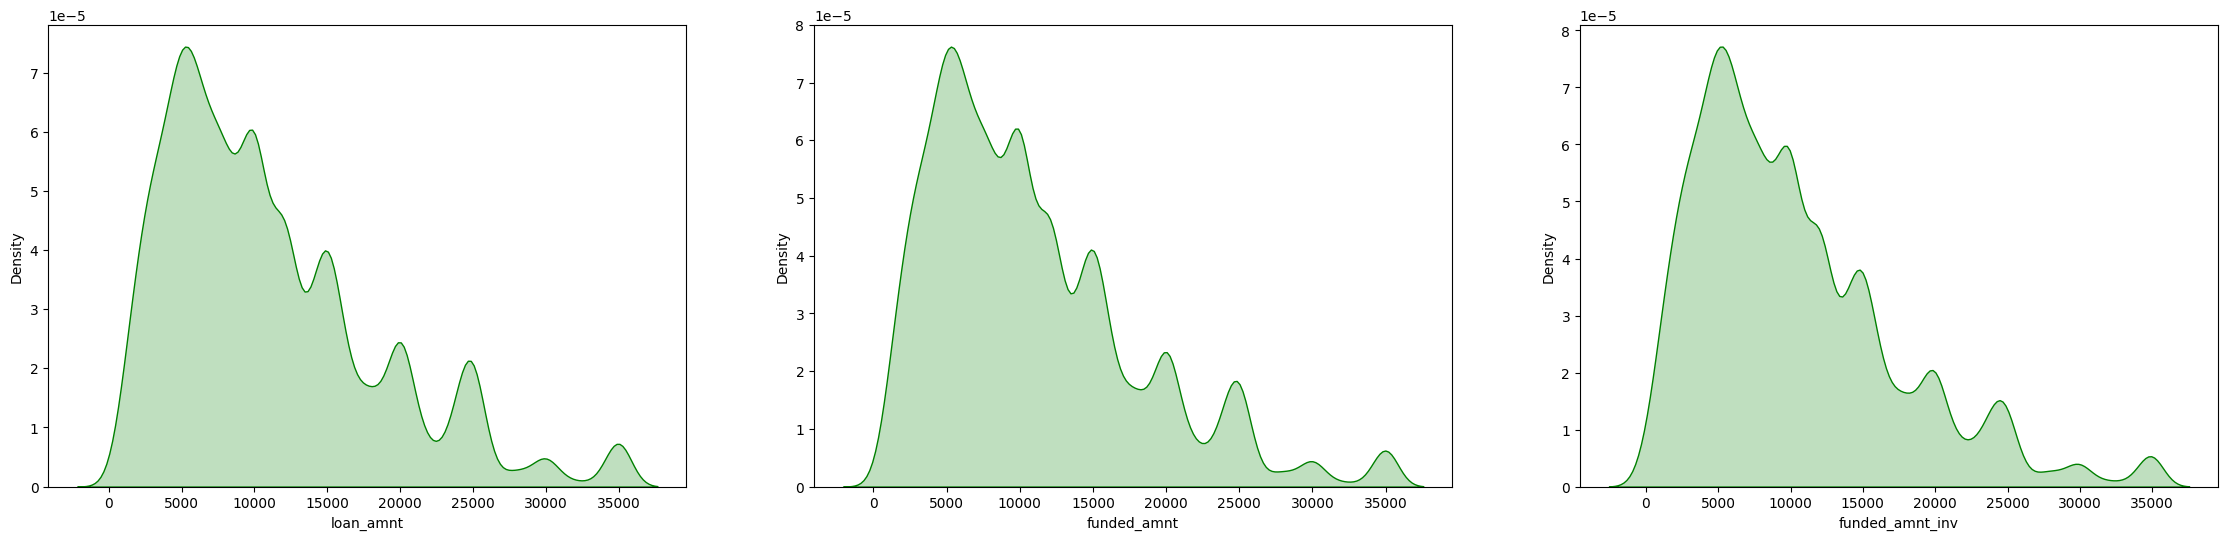

In [ ]:
# understanding the feature similarity

# creating plot
fig = plt.figure(figsize=(28, 6))
spec = fig.add_gridspec(1, 3)
sec_1 = fig.add_subplot(spec[0, 0])
sec_2 = fig.add_subplot(spec[0, 1])
sec_3 = fig.add_subplot(spec[0, 2])

# adding color prefernce
bg_color = 'white'
for selection in [fig, sec_1, sec_2, sec_3]:
    selection.set_facecolor(bg_color)

# plot the graph
sec = [sec_1, sec_2, sec_3]

cnt = 0
for feature in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    sns.kdeplot(data[feature], fill=True, color='green', ax=sec[cnt])
    cnt += 1

plt.show()

# Observation

* Density distribution for all the three features are similar. Hence, we can proceed forward to anlayse with any of the feature.
* Based on the nature by description we will proceed forward with "loan_amnt".

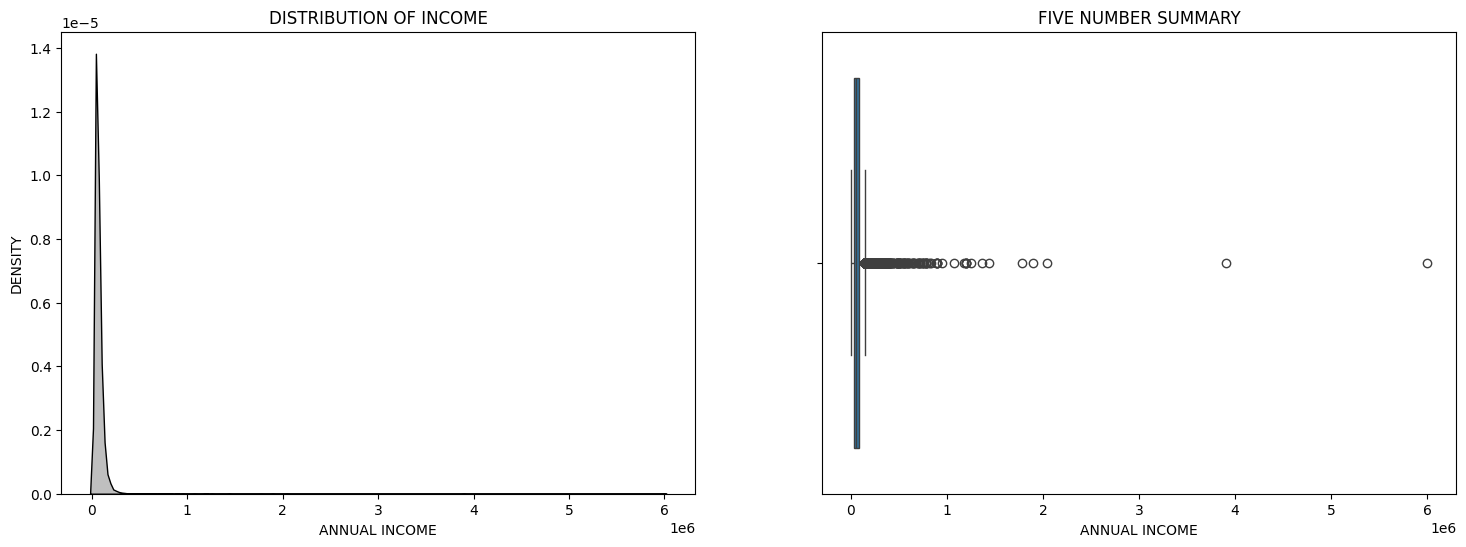

In [ ]:
# Analysing the annual income

# Distribution plot and outlier plot
# distribution plot
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
viz = sns.kdeplot(data['annual_inc'], fill=True, color='black')
viz.set_title('DISTRIBUTION OF INCOME')
viz.set_xlabel('ANNUAL INCOME')
viz.set_ylabel('DENSITY')

# outlier plot
plt.subplot(1,2,2)
viz = sns.boxplot(data['annual_inc'], orient='h')
viz.set_title('FIVE NUMBER SUMMARY')
viz.set_xlabel('ANNUAL INCOME')
plt.show()

In [ ]:
# Numerical summary
print('Numerical Summary of annual_inc:')
print('Mean:', data['annual_inc'].mean())
print('Median:', data['annual_inc'].quantile(0.5))
print('75%:', data['annual_inc'].quantile(0.75))
print('90%:', data['annual_inc'].quantile(0.9))
print('95%:', data['annual_inc'].quantile(0.95))
print('99%:', data['annual_inc'].quantile(0.99))
print('100%:', data['annual_inc'].quantile(1))

Numerical Summary of annual_inc:
Mean: 68777.97368120901
Median: 58868.0
75%: 82000.0
90%: 115000.0
95%: 140004.0
99%: 234143.99999999878
100%: 6000000.0


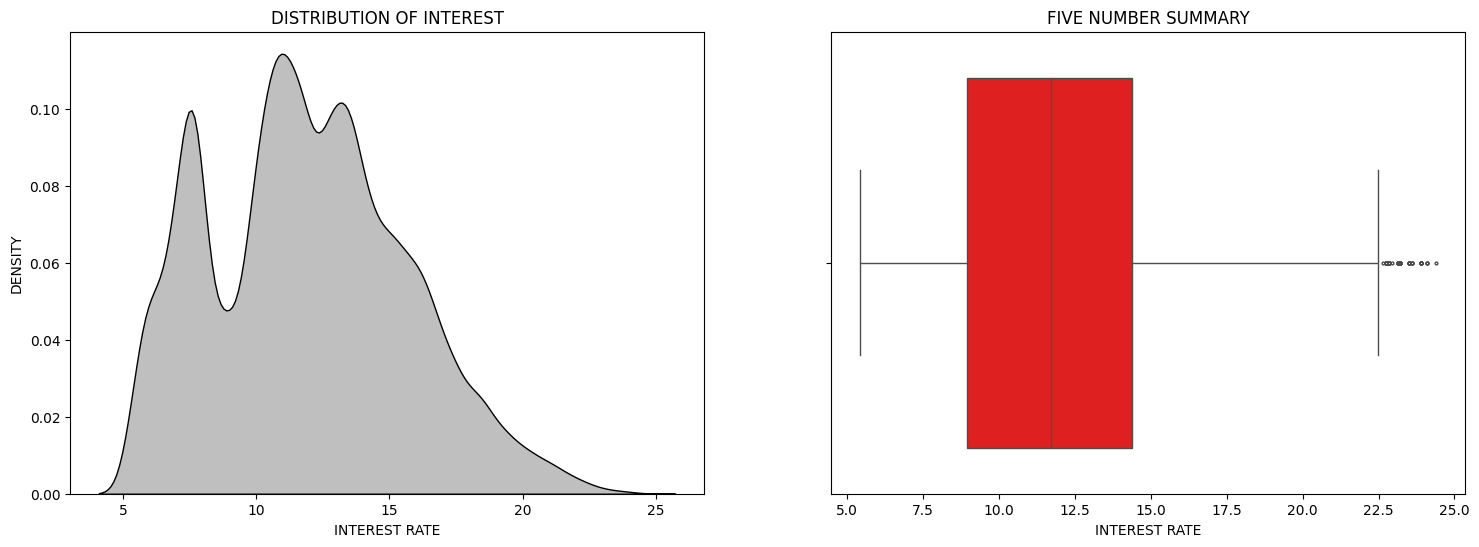

In [ ]:
# Analysing the interest rate column

# Distribution plot and outlier plot
# distribution plot
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
viz = sns.kdeplot(data['int_rate'], fill=True, color='black')
viz.set_title('DISTRIBUTION OF INTEREST')
viz.set_xlabel('INTEREST RATE')
viz.set_ylabel('DENSITY')

# outlier plot
plt.subplot(1,2,2)
viz = sns.boxplot(data['int_rate'], orient='h', color='red', fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY')
viz.set_xlabel('INTEREST RATE')
plt.show()

In [ ]:
# Numerical summary
data['int_rate'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

,int_rate
count,38577.000000
mean,11.932219
std,3.691327
min,5.420000
25%,8.940000
50%,11.710000
75%,14.380000
90%,16.820000
95%,18.312000
99%,20.990000


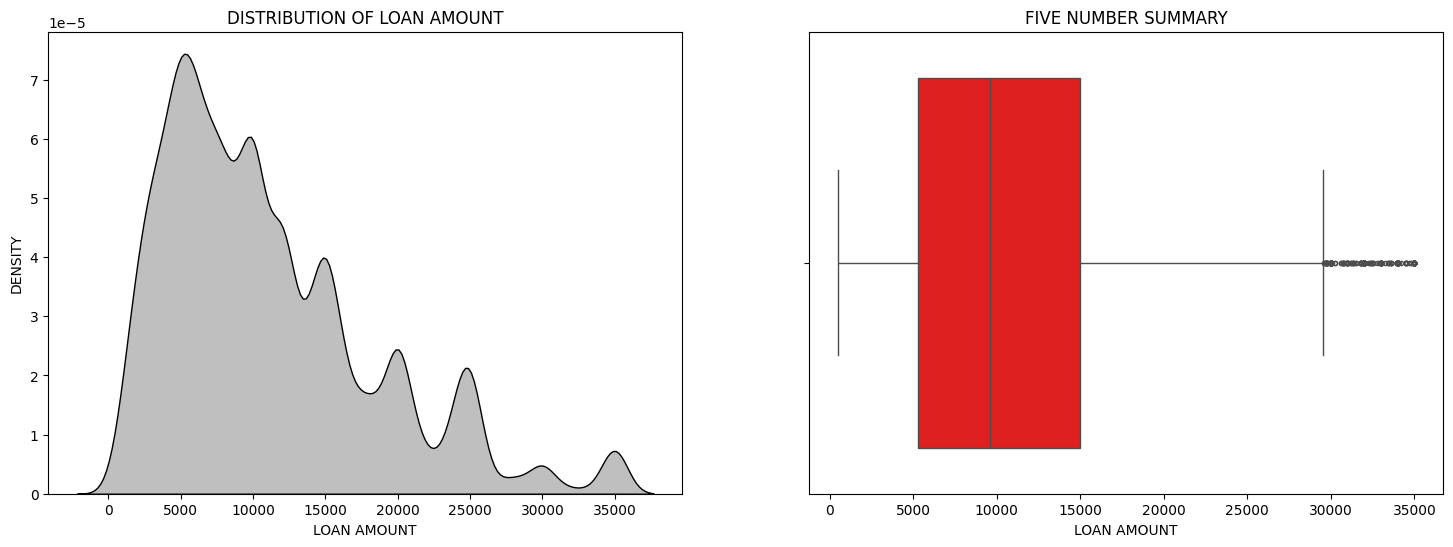

In [ ]:
# Univariate analysis on loan_amnt

# Distribution plot and outlier plot
# distribution plot
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
viz = sns.kdeplot(data['loan_amnt'], fill=True, color='black')
viz.set_title('DISTRIBUTION OF LOAN AMOUNT')
viz.set_xlabel('LOAN AMOUNT')
viz.set_ylabel('DENSITY')

# outlier plot
plt.subplot(1,2,2)
viz = sns.boxplot(data['loan_amnt'], orient='h', color='red', fliersize=3)
viz.set_title('FIVE NUMBER SUMMARY')
viz.set_xlabel('LOAN AMOUNT')
plt.show()

In [ ]:
# Numerical summary
print('Numerical Summary of int_rate:')
print('Mean:', data['loan_amnt'].mean())
print('Median:', data['loan_amnt'].quantile(0.5))
print('75%:', data['loan_amnt'].quantile(0.75))
print('90%:', data['loan_amnt'].quantile(0.9))
print('95%:', data['loan_amnt'].quantile(0.95))
print('99%:', data['loan_amnt'].quantile(0.99))
print('100%:', data['loan_amnt'].quantile(1))

Numerical Summary of int_rate:
Mean: 11047.02542966016
Median: 9600.0
75%: 15000.0
90%: 21600.0
95%: 25000.0
99%: 35000.0
100%: 35000.0


# Univariate analysis on loan year and month and tenure

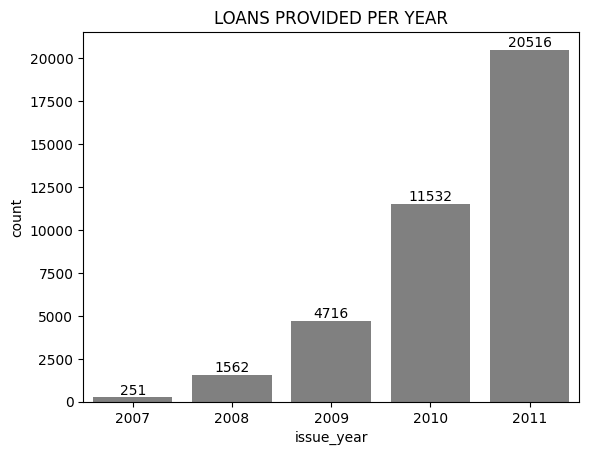

In [ ]:
# create count plot for loan issued per year

ax = sns.countplot(x=data['issue_year'], color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('LOANS PROVIDED PER YEAR')
plt.show()

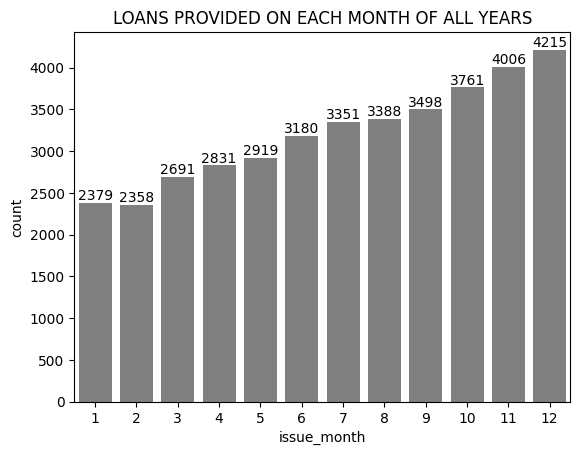

In [ ]:
# create count plot for loan issued on month basis cummulatively for all years

ax = sns.countplot(x=data['issue_month'], color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('LOANS PROVIDED ON EACH MONTH OF ALL YEARS')
plt.show()

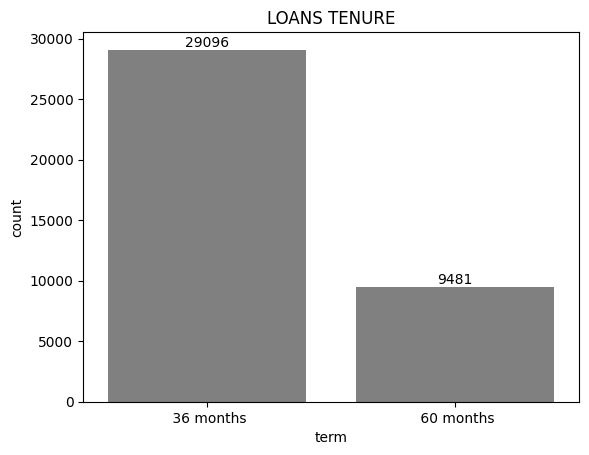

In [ ]:
# Creating the countplot for loan tenure

ax = sns.countplot(x=data['term'], color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('LOANS TENURE')
plt.show()

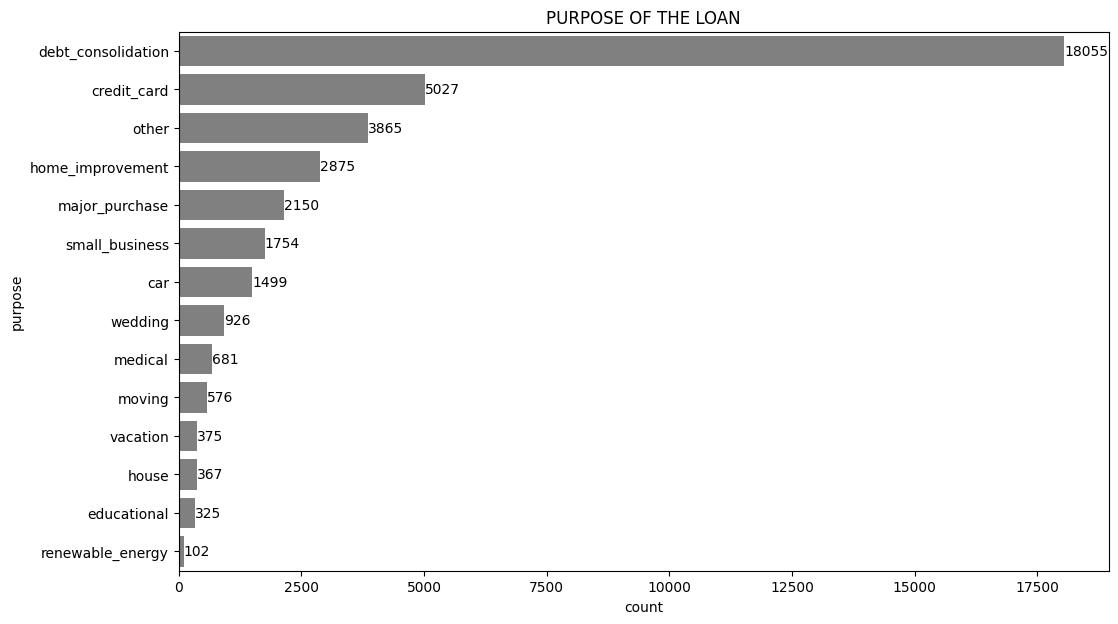

In [ ]:
# Creating the countplot for loan purpose

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=data['purpose'],
                   order= data['purpose'].value_counts().index,
                   color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('PURPOSE OF THE LOAN')
plt.show()

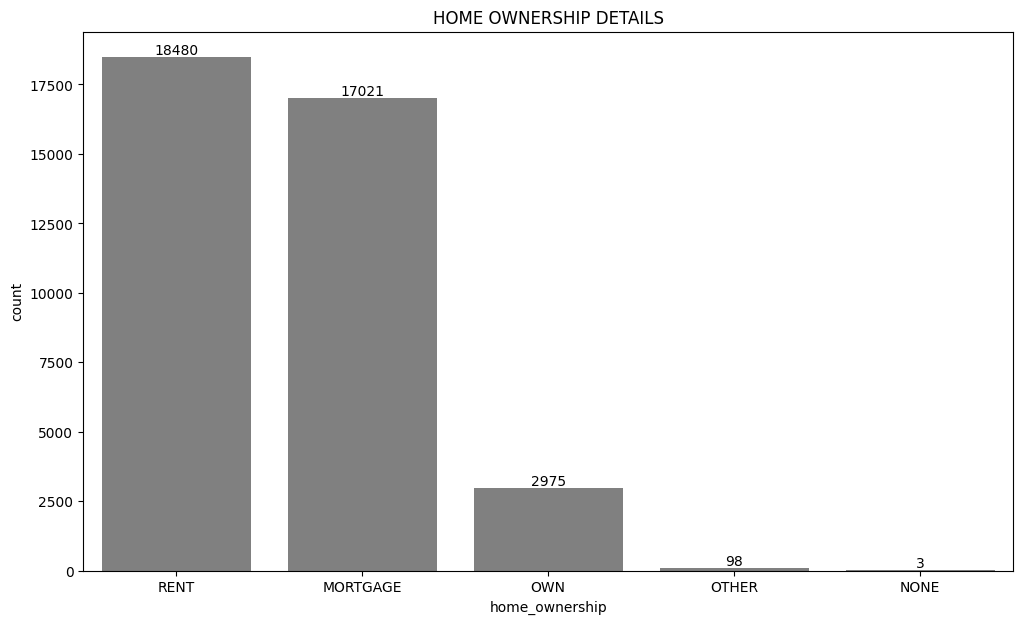

In [ ]:
# count plot for home ownership

plt.figure(figsize=(12, 7))
ax = sns.countplot(x=data['home_ownership'],
                   order= data['home_ownership'].value_counts().index,
                   color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('HOME OWNERSHIP DETAILS')
plt.show()

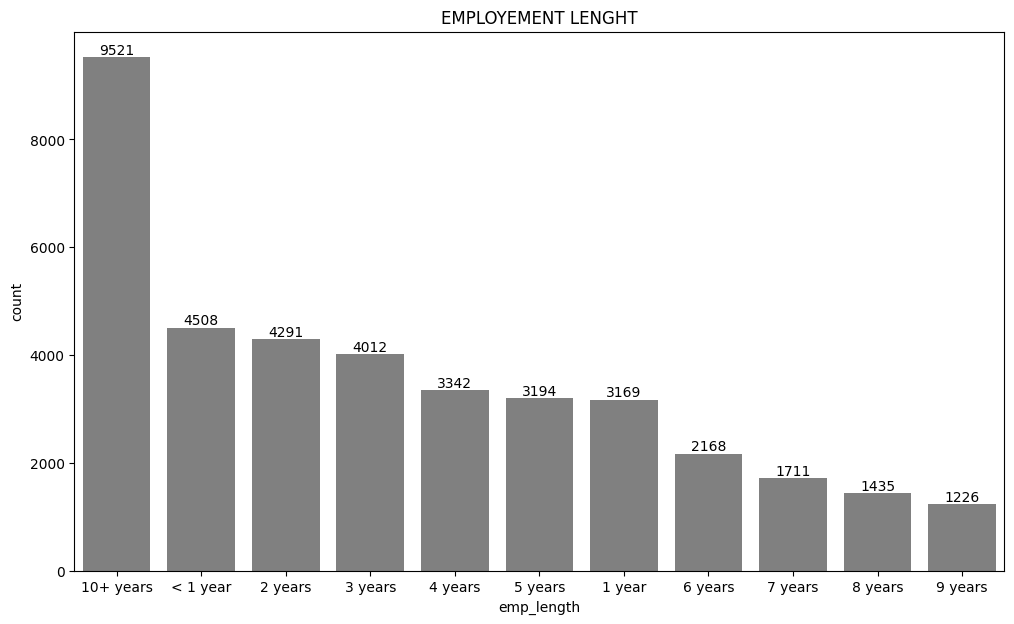

In [ ]:
# create countplot for emp_length
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='emp_length',
              order=data['emp_length'].value_counts().index,
              data=data,
              color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('EMPLOYEMENT LENGHT')
plt.show()

# OBSERVATION ON UNIVARIATE ANALYSIS

* Looks like the 'annual_inc' has outliers on the upper fence.
* Most of the borrowers prefer to get loan amount between 5000 to 15000.
* Almost of the borrowers gets interest rate between 9% to 14%.

* Number of borrowers increasing every year with More Loan Purpose [People getting in the last quarter 98 high]
* Number of borrowers choose 36-months tenure

* Larger tenure Loans may cause higher risky.

* Main loan Purpose are debt-consolidation, and Credit Card personal loan
* Few borrowers has own house.
* Borrowers with less than < 3 years, experience take more Loan than those with 10+ years.



```
# should not remove / treat outliers when doing EDA for data analysis
# outliers should be removed / treated as last step of EDA only if this data will be used for ML models
```



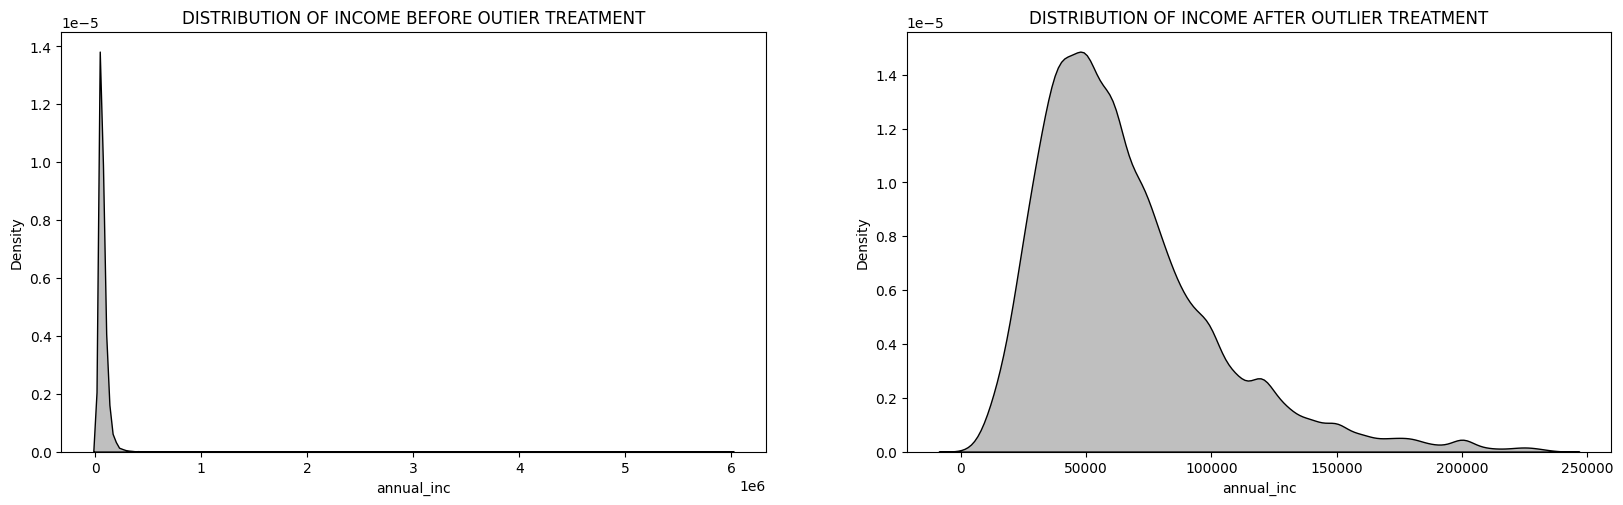

In [ ]:
# OUTLIER TREATMENT

# Distribution plot before outlier
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
ax = sns.kdeplot(data['annual_inc'], fill=True, color='black')
ax.set_title('DISTRIBUTION OF INCOME BEFORE OUTIER TREATMENT')

# removing the outliers
data = data[data['annual_inc'] < data['annual_inc'].quantile(0.99)]

# Distribution plot after outlier
plt.subplot(2,2,2)
ax = sns.kdeplot(data['annual_inc'], fill=True, color='black')
ax.set_title('DISTRIBUTION OF INCOME AFTER OUTLIER TREATMENT')
plt.show()

# Understanding the financial features

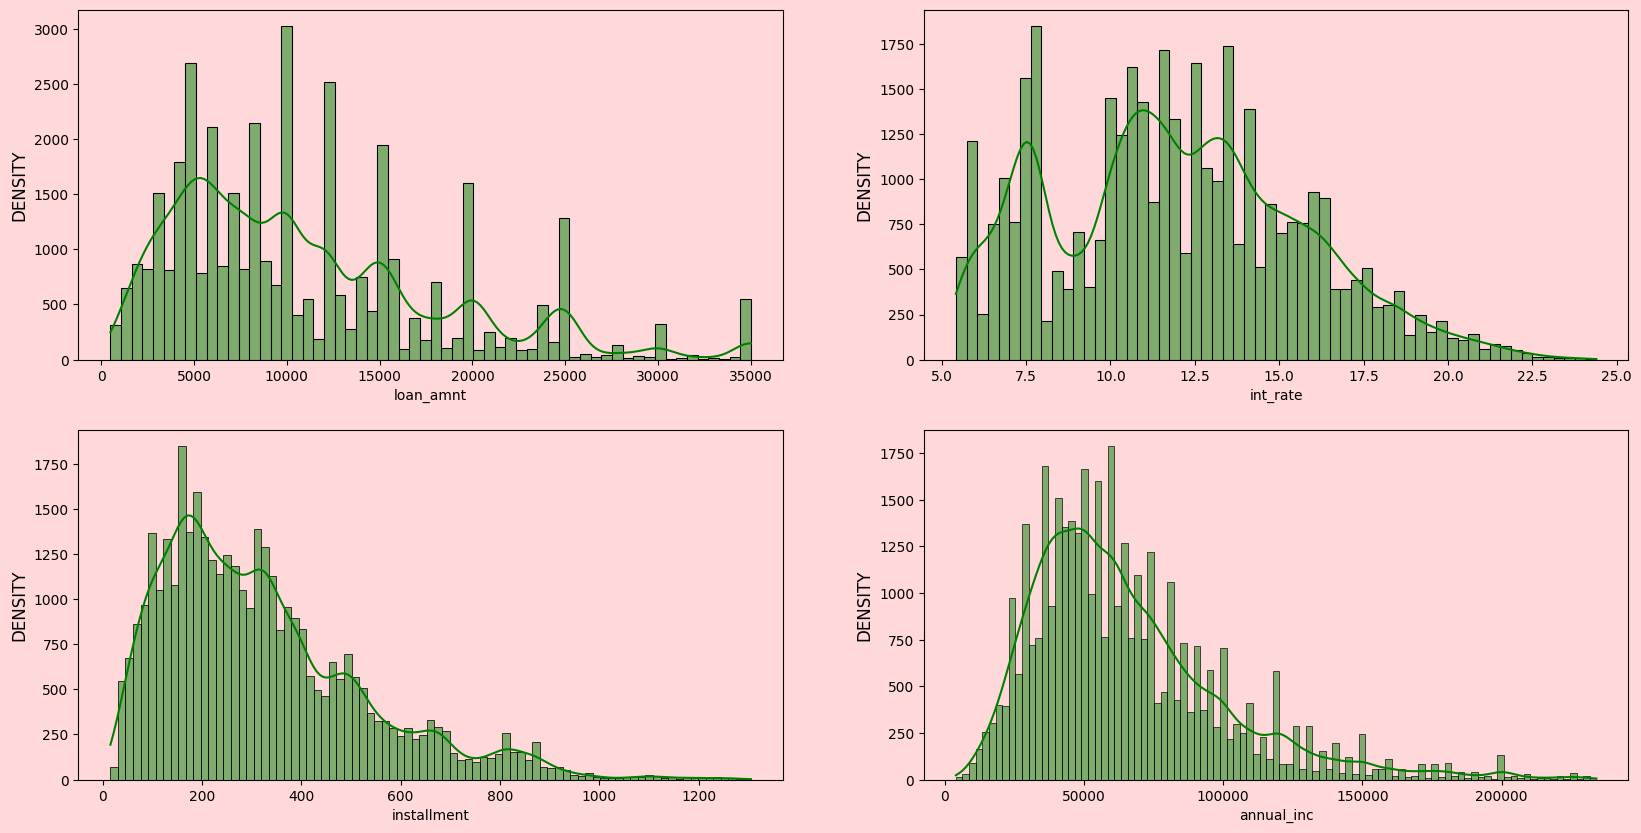

In [ ]:
# Creating plots
fig, axes = plt.subplots(2, 2, figsize=(20,10), facecolor='#ffd9d9')
axes = axes.flatten()

# Adding color preference
bg_color = '#ffd9d9'
for ax in axes:
    ax.set_facecolor(bg_color)

# Plotting the graph
features = ["loan_amnt", "int_rate", "installment", "annual_inc"]
for ax, feature in zip(axes, features):
    sns.histplot(data[feature], kde=True, ax=ax, color='green')
    ax.set_ylabel('DENSITY' , fontsize=12)

plt.show()

# Creating buckets for bi-variate analysis


In [ ]:
# Categorical bucket for loan_amount
data['loan_amnt_bkt'] = pd.cut(data['loan_amnt'],
                               list(range(0, 40000, 7000)),
                               labels=['0-7k', '7k-14k', '14k-21k', '21k-28k', '28k+'])

# categorical bucket for interest rate
data['int_rate_bkt'] = pd.cut(data['int_rate'],
                               list(range(5, 26, 5)),
                               labels=['5-10', '10-15', '15-20', '20+'])

# categorical bucket for annual income
data['annual_inc_bkt'] = pd.cut(data['annual_inc'],
                               list(range(0, 250001, 50000)),
                               labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])

# categorical bucket for installment
data['installment_bkt'] = pd.cut(data['installment'],
                               list(range(0, 1401, 200)),
                               labels=['0-200', '200-400', '400-600', '600-800',
                                       '800-1000', '1000-1200', '1200+'])

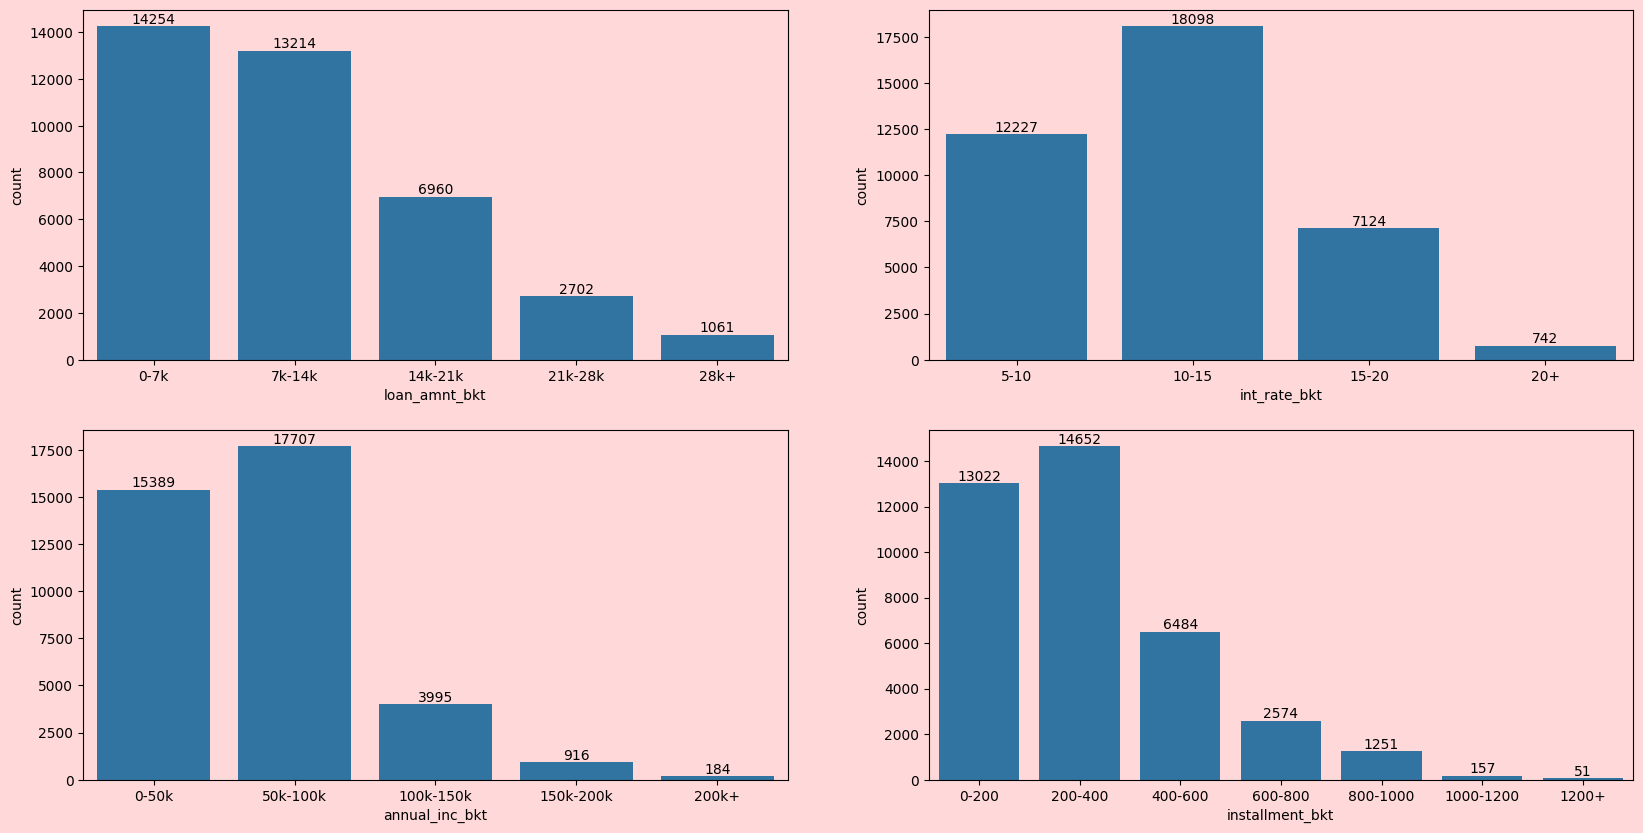

In [ ]:
# plot the bucket data information
fig, axes = plt.subplots(2, 2, figsize=(20,10), facecolor='#ffd9d9')
axes = axes.flatten()

# adding color preferences
for ax in axes:
    ax.set_facecolor('#ffd9d9')

# ploting the graphs
features = ['loan_amnt_bkt', 'int_rate_bkt', 'annual_inc_bkt', 'installment_bkt']
for ax, feature in zip(axes, features):
    pl = sns.countplot(x=data[feature], ax=ax)
    pl.bar_label(pl.containers[0])

plt.show()

# Bivariate Analysis

* Moving forward in bivariate analysis we just need the data of "Charged Off" borrowers.
* So, we create a new dataframe that has only "Charged Off" borrowers data.

In [ ]:
# creating a dataframe for charged off borrowers
co_data = data[data['loan_status'] == 'Charged Off']

# Looking for the nature of the data
print('Data Dimension:', co_data.shape)

Data Dimension: (5584, 29)


EMPLOYMENT LENGHT VS LOAN STATUS

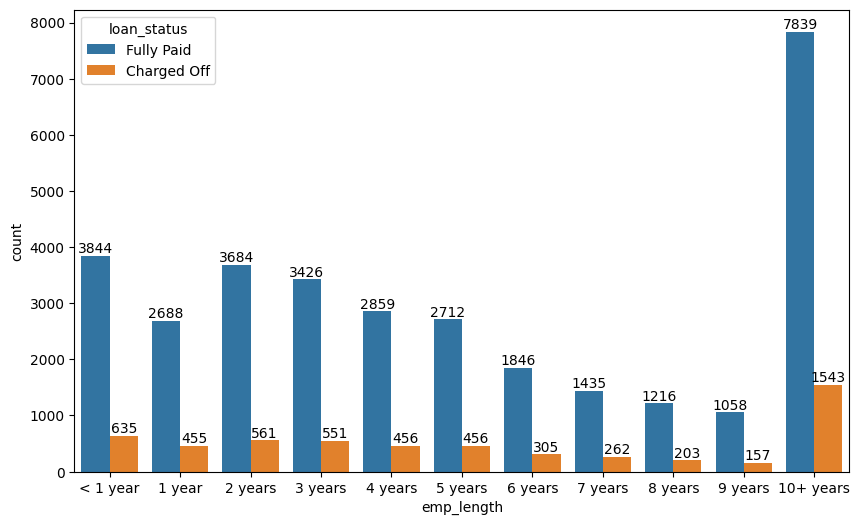

In [ ]:
# count plot for employement lenght by loan status as hue

plt.figure(figsize=(10, 6))
ax = sns.countplot(x=data['emp_length'], hue=data['loan_status'],
                   order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
                            '6 years', '7 years', '8 years', '9 years' , '10+ years' ])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

HOME OWNERSHIP VS LOAN AMOUNT

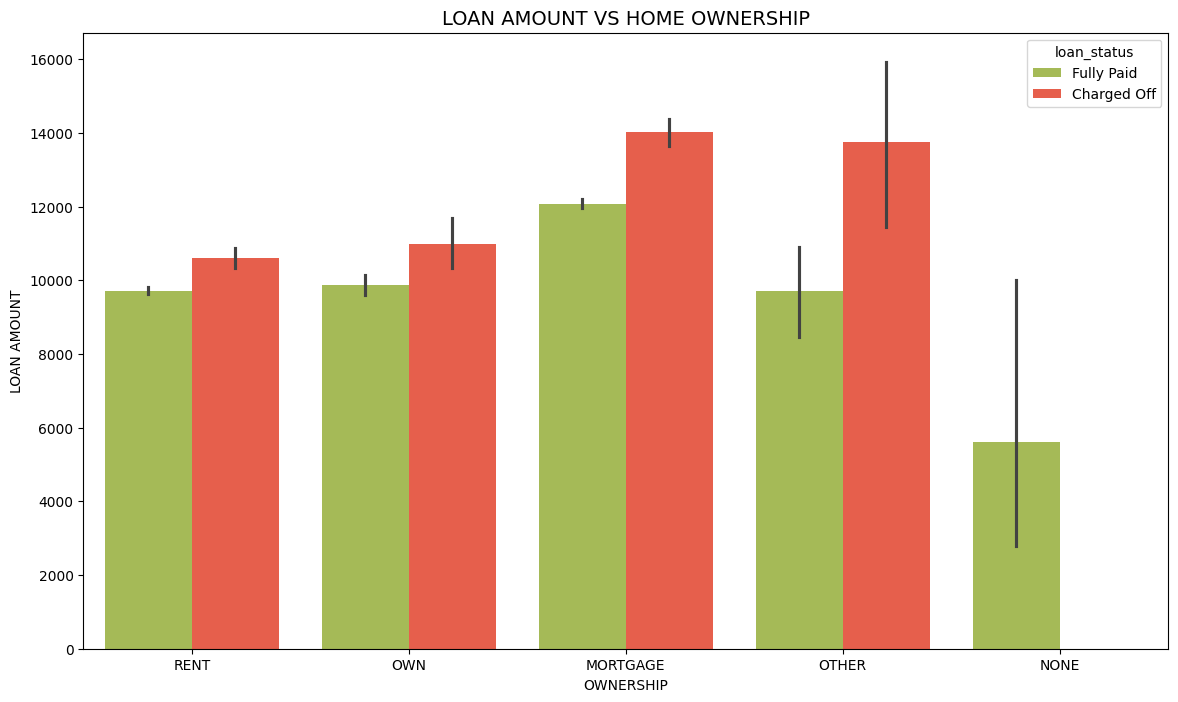

In [ ]:
# Bar plot for loan amount by home ownership
plt.figure(figsize=(14,8))
ax = sns.barplot(data =data,
                 x='home_ownership',
                 y='loan_amnt',
                 hue ='loan_status',
                 palette=['#AECB46', "#FF4C33"])

# Naming the axis and title
ax.set_title('LOAN AMOUNT VS HOME OWNERSHIP',fontsize=14,color='black')
ax.set_xlabel('OWNERSHIP',fontsize =10,color = 'black')
ax.set_ylabel('LOAN AMOUNT',fontsize =10,color = 'black')
plt.show()

LOAN AMOUNT VS PURPOSE

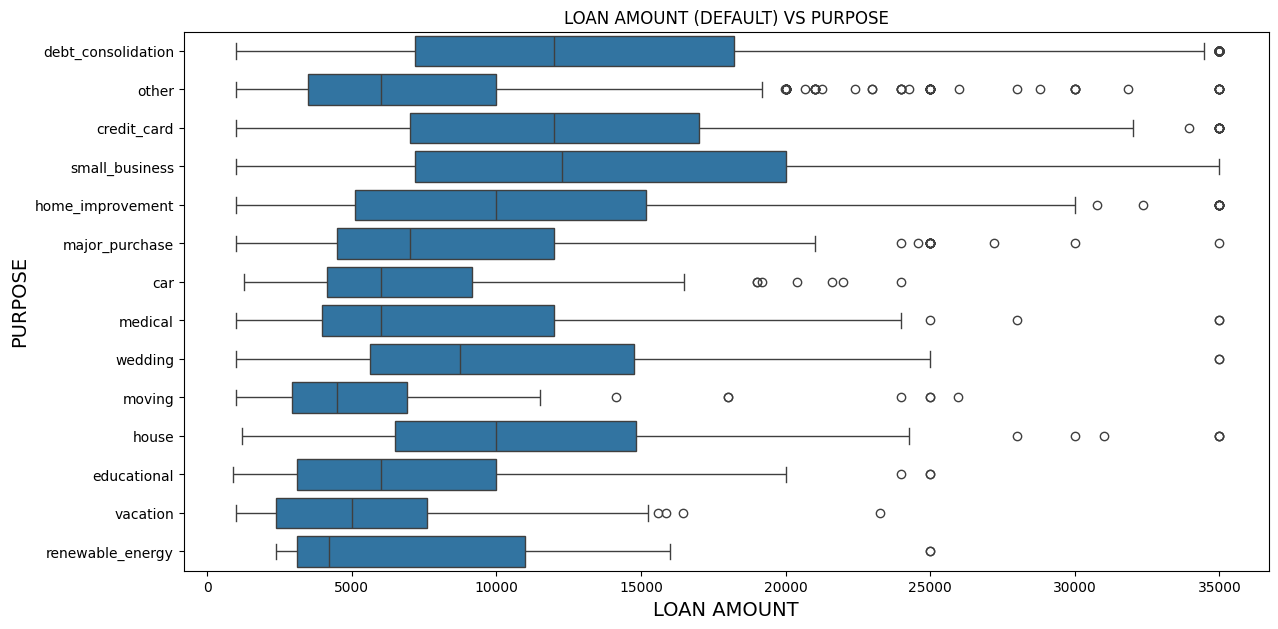

In [ ]:
# Box plot for loan amount vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='loan_amnt',
            y='purpose',
            order=co_data['purpose'].value_counts().index,
            data=co_data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('LOAN AMOUNT (DEFAULT) VS PURPOSE')
plt.show()

INTEREST RATE (DEFAULT) VS PURPOSE

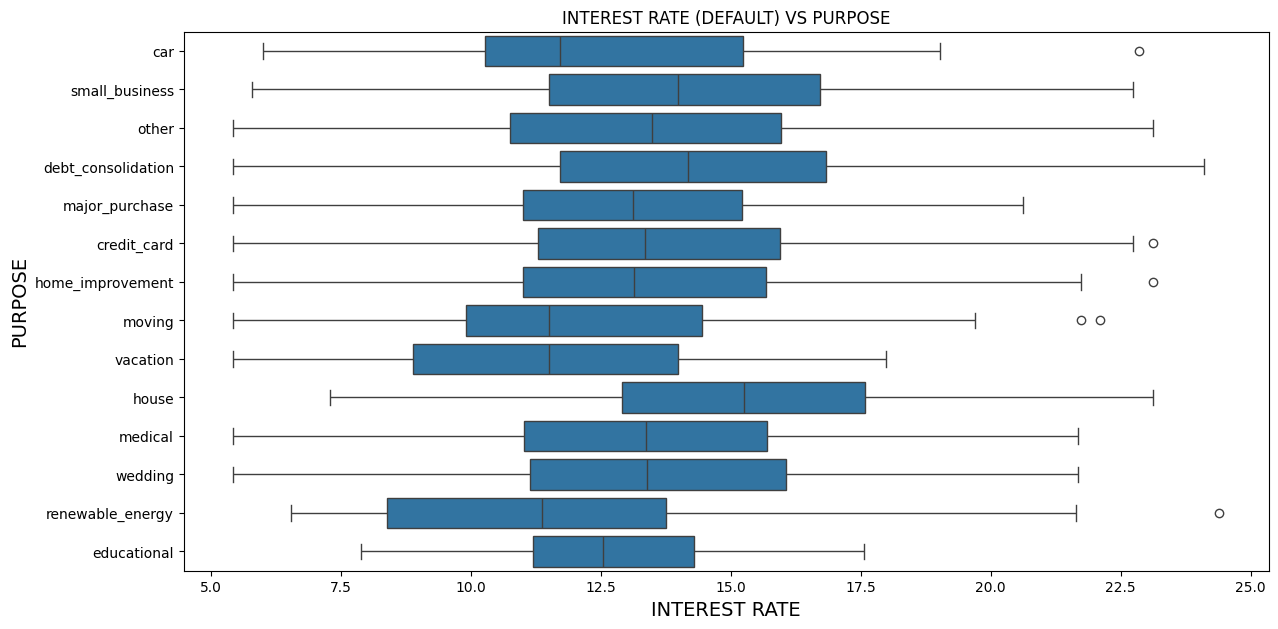

In [ ]:
# Box plot for interest rate vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='int_rate',
            y='purpose',
            data=co_data)

# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('INTEREST RATE (DEFAULT) VS PURPOSE')
plt.show()

LOAN AMOUNT BUCKET VS INTEREST RATE BY LOAN STATUS

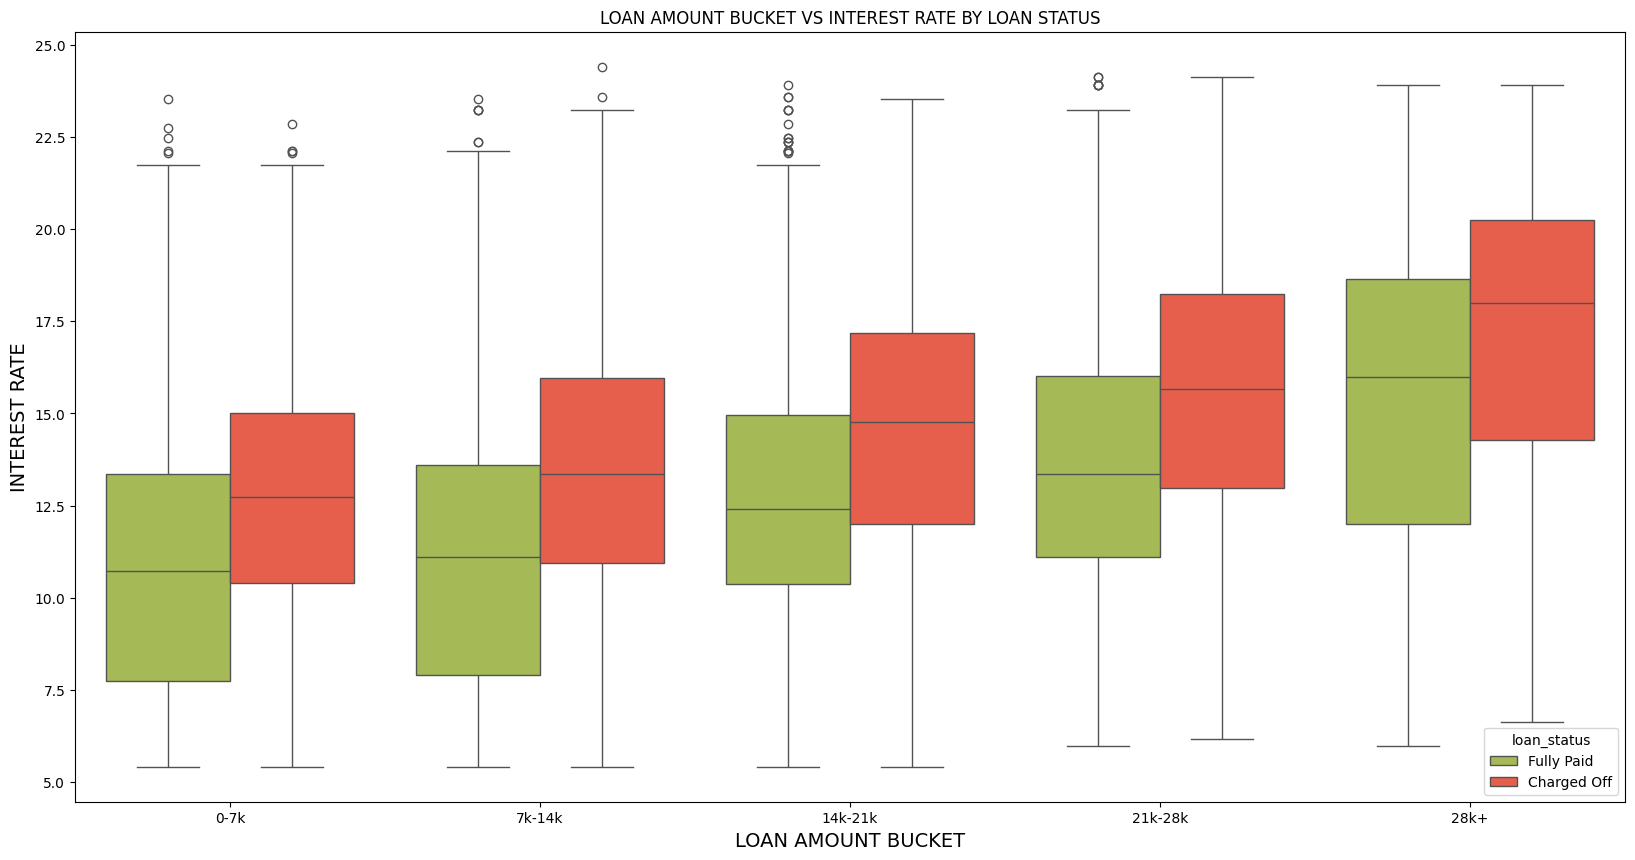

In [ ]:
# Box plot for loan amount bucket vs interest rate by loan status as hue
plt.figure(figsize=(20,10))
viz = sns.boxplot(x='loan_amnt_bkt',
            y='int_rate',
            hue = 'loan_status',
            order=data['loan_amnt_bkt'].value_counts().index,
            palette=['#AECB46', "#FF4C33"],
            data=data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('LOAN AMOUNT BUCKET VS INTEREST RATE BY LOAN STATUS')
plt.show()

INTEREST RATE VS INSTALLEMENT WITH LOAN STATUS AS HUE

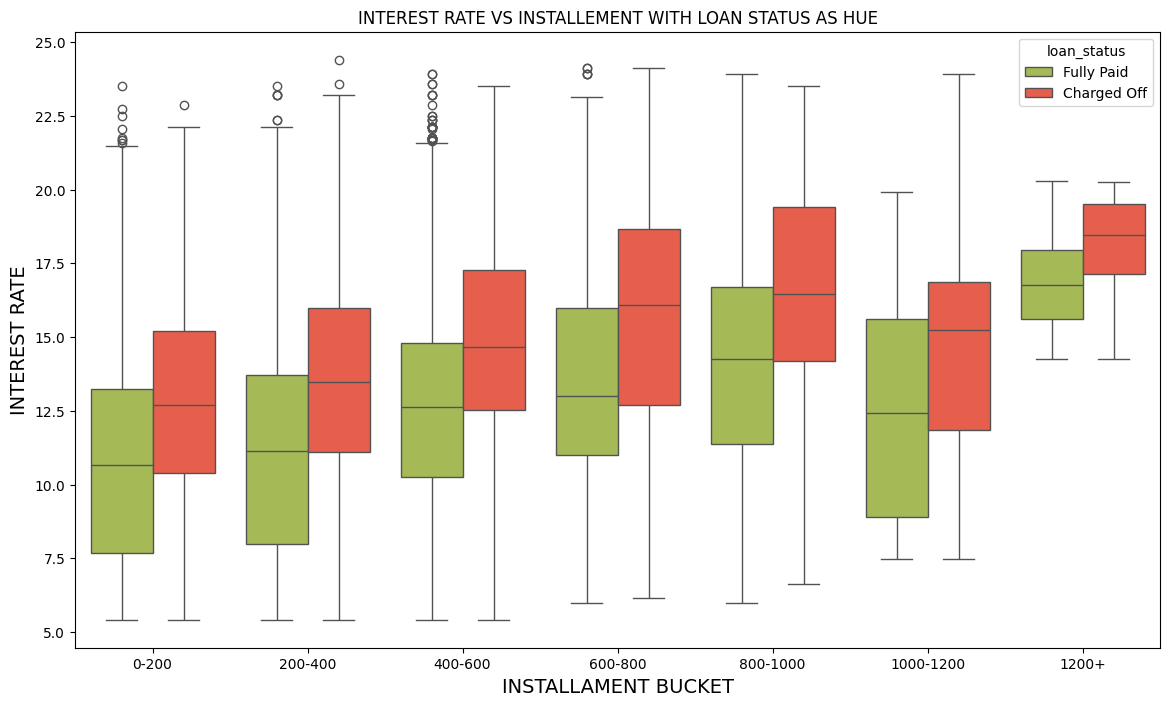

In [ ]:
# Box plot for installment bucket vs interest rate by loan status as hue
plt.figure(figsize=(14,8))
viz = sns.boxplot(x='installment_bkt',
            y='int_rate',
            hue = 'loan_status',
            palette=['#AECB46', "#FF4C33"],
            data=data)

# Naming the axis and title
viz.set_xlabel('INSTALLAMENT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('INTEREST RATE VS INSTALLEMENT WITH LOAN STATUS AS HUE')
plt.show()

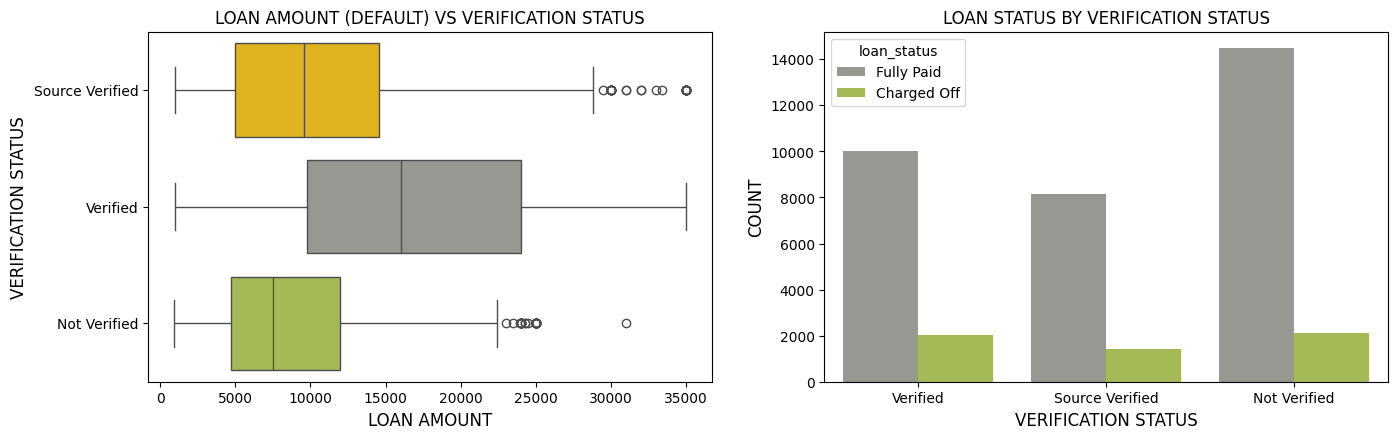

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='loan_amnt',
            y='verification_status',
            palette=["#FFC300", '#979A90', "#AECB46"],
            data=co_data)
# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 12)
viz.set_ylabel('VERIFICATION STATUS', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS VERIFICATION STATUS')

# Count plot for verification status vs count by loan_status as hue
plt.subplot(2,2,2)
viz = sns.countplot(x='verification_status',
              hue='loan_status',
              palette=['#979A90', "#AECB46"],
              data = data)
# Naming the axis and title
viz.set_xlabel('VERIFICATION STATUS', fontsize = 12)
viz.set_ylabel('COUNT', fontsize = 12)
viz.set_title('LOAN STATUS BY VERIFICATION STATUS')
plt.show()

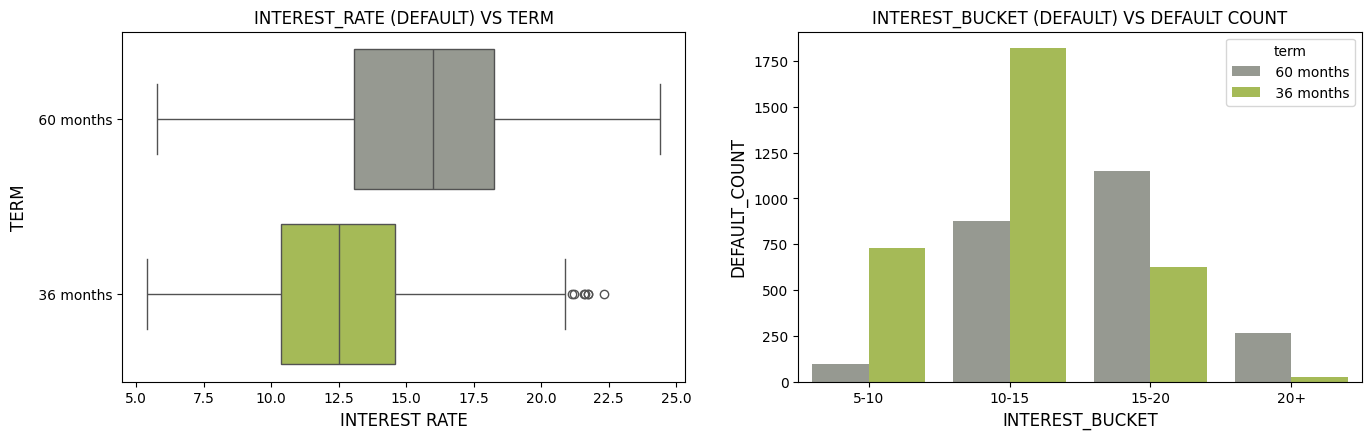

In [ ]:
# Box plot for interest rate vs term
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='int_rate',
            y='term',
            palette=['#979A90',"#AECB46"],
            data=co_data)
# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 12)
viz.set_ylabel('TERM', fontsize = 12)
viz.set_title('INTEREST_RATE (DEFAULT) VS TERM')

# Count plot for interest rate vs default count by term as hue
plt.subplot(2,2,2)
viz = sns.countplot(x='int_rate_bkt',
              hue='term',
              palette=['#979A90', "#AECB46"],
              data = co_data)
# Naming the axis and title
viz.set_xlabel('INTEREST_BUCKET', fontsize = 12)
viz.set_ylabel('DEFAULT_COUNT', fontsize = 12)
viz.set_title('INTEREST_BUCKET (DEFAULT) VS DEFAULT COUNT')

plt.show()

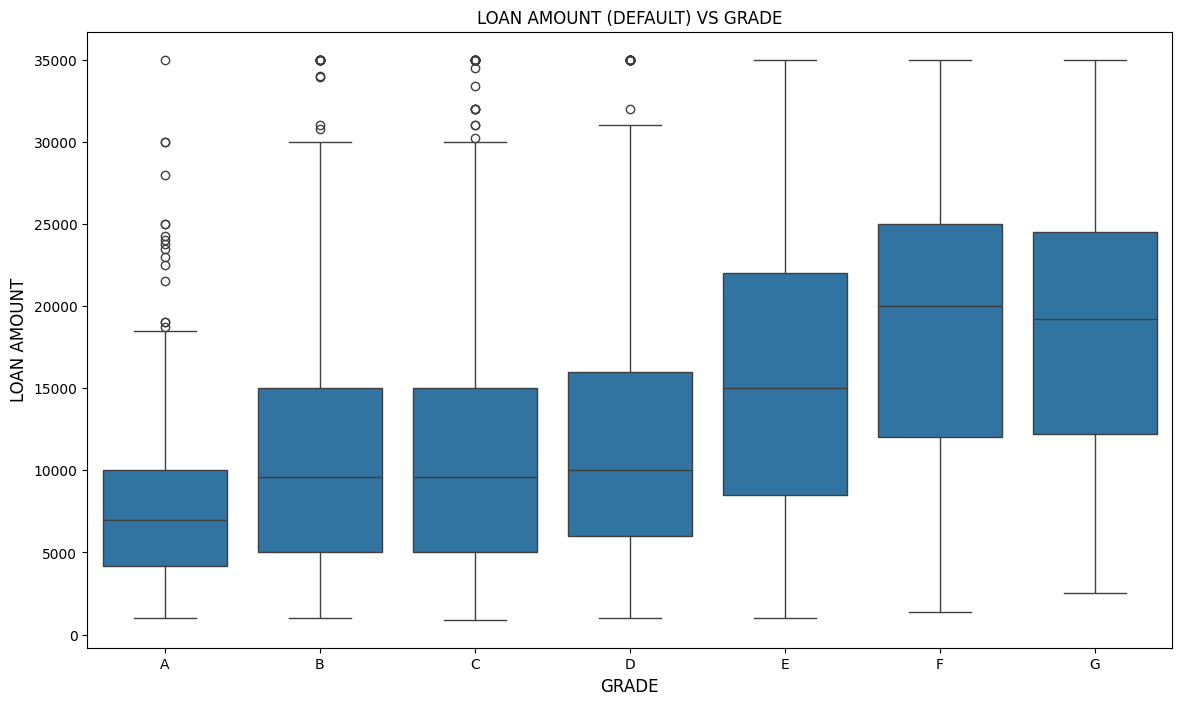

In [ ]:
# Box plot for loan amount vs grade
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt',
            x='grade',
            order=['A','B','C','D','E','F','G'],
            data=co_data)

# Naming the axis and title
viz.set_ylabel('LOAN AMOUNT', fontsize = 12)
viz.set_xlabel('GRADE', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS GRADE')
plt.show()

# OBSERVATION ON BIIVARIATE

* Borrowers with 10+ years of employment length are more likely to charge off.
* Borrowers living on mortgage with loan amount greater than 12k are likely to charge off.

* Loan for debt consolidation, credit card, small business with average loan amount greater than 12000 are more likely to charge off.
* Loan provided for house, debt consolidation, small business with highest interest rate are more likely to charge off.


* Loan with highest interest rate in all buckets are more likely to charge off.
* As the number of installment increase the borrowers with high interest rate (>13%) are more likely to charge off.

* Borrowers with verification status "not-verified" has loan amount with 5k to 12.5k are more likely to charge off.
* Borrowers with verification status "not-verified" and "verified" has a equal proportion in charge off.


* Longer tenure has the higher interest rate and people in this term with interest rate between 15-20% is more likely to charge off.
* Shorter tenure has the lower interest rate and people in this term with interest rate between 10-15% is more likely to charge off.


* Borrower within grade E,F,G and with average loan amount greater than 15000 are more likely to charge off, but this is equally likely.


# DRIVING FACTORS TO CHARGE OFF
* Borrowers with high interest and 10+ years of employment length.
* Borrowers living on mortgage with loan amount greater than 12000.
* Loan for debt consolidation, credit card, small business with loan amount greater than 12000.
* For any loan amount provided with an average interest rate higher than 13%.
* Loan provided for house purpose with average interest greater than 15%.
* Loan provided with an average of 12.5% interest rate for 36months of tenure.
* Loan provided with an average of 16.5% interest rate for 60months of tenure.
* Average loan amount greater than 15000 with grade E, F, G (equally likely).
* Installments between 800 - 12000 with average interest greater than 15%.
* Average interest rate of 17% with installment greater than 12000.

# Multivariate Analysis



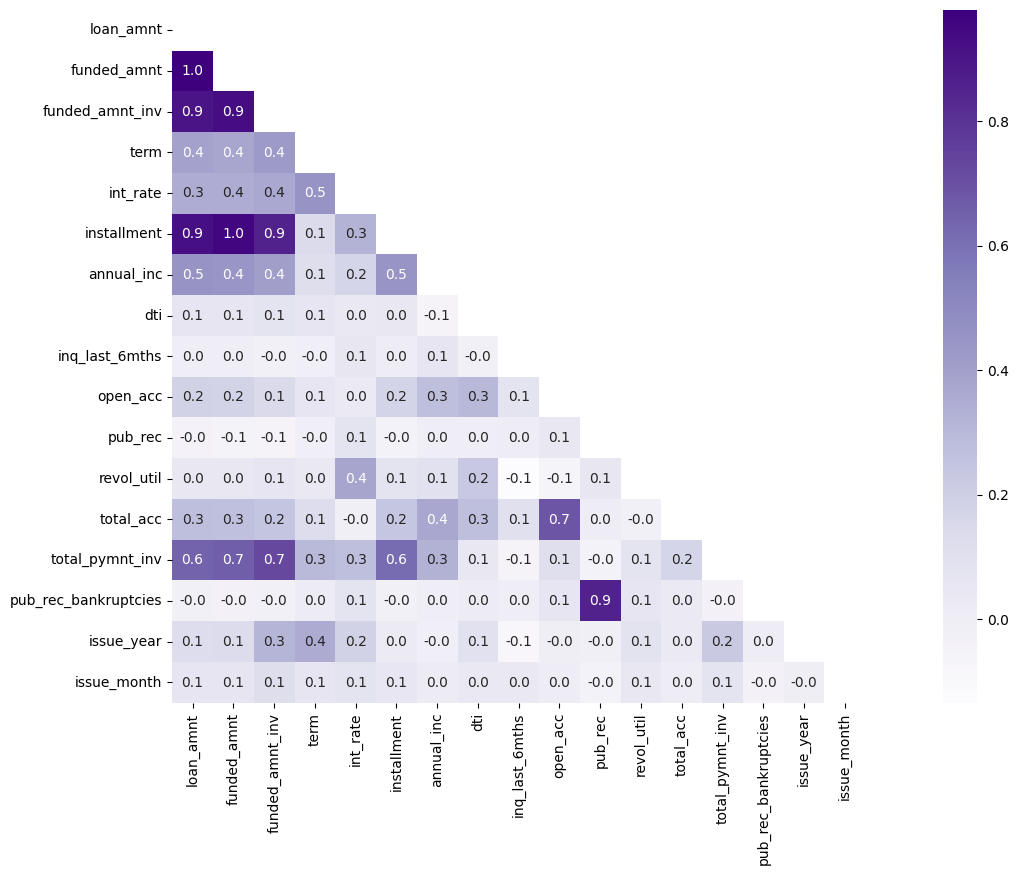

In [ ]:
# Convert 'term' to numeric by extracting the number of months
co_data['term'] = co_data['term'].apply(lambda x: int(x.split(' ')[1]))

# Creating a correlation heatmap
plt.figure(figsize=(20,9))
correlation = co_data.corr(numeric_only=True)
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt = '.1f', mask=mask, square=True, cmap='Purples')
plt.show()

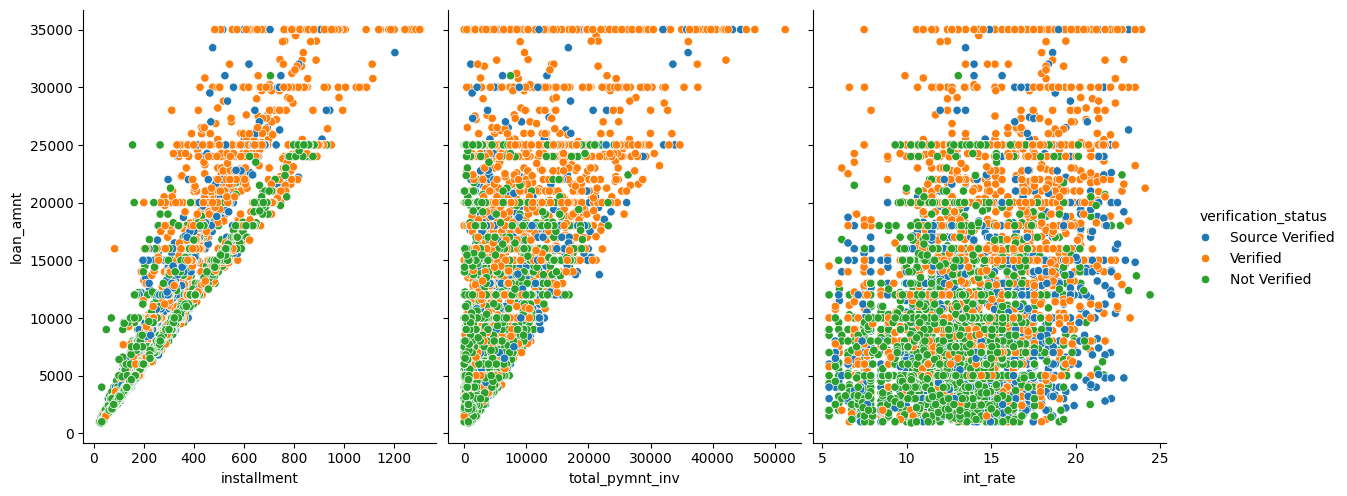

In [ ]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' vs loan amount by verification status as hue
sns.pairplot(co_data,
             x_vars=['installment', 'total_pymnt_inv', 'int_rate'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='verification_status',
             height=5,
             aspect=0.8,
             kind='scatter')

plt.show()

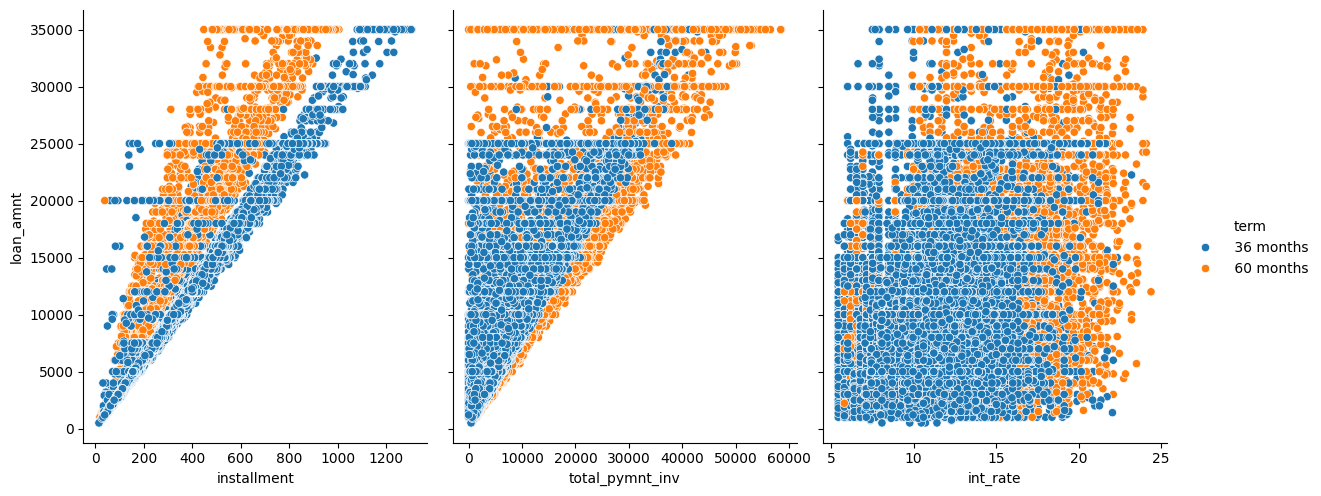

In [ ]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' vs loan amount by term as hue
sns.pairplot(data,
             x_vars=['installment', 'total_pymnt_inv', 'int_rate'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='term',
             height=5,
             aspect=0.8,
             kind='scatter')

plt.show()

OBSERVATION FOR MULTIVARIATE ANALYSIS

From Correlation Heatmap

   * loan_amnt has strong positve correlation with installment, total_payment_inv
   * loan_amnt has intermediate positive correlation with annual_inc, int_rate, total_acc
   * open_acc has strong positive correlation with total_acc.
   * pub_rec has strong positve correlation with pub_rec_bankruptcies.

From Pairplot

* When the loan amount increases, number of installment, total_pymnt_inv, int_rate also increases.
* Borrowers with verification status "Not-Verified" are mostly to get loan less than 25k (Charge off).
* Borrowers with verification status "Verified" are most likely to get loan greater than 25k (Charge off).
* Borrowers with lower term has higher installments comparatively.
Borrowers with 60 months term has highest share to total_pymnt_inv.

**Borrower Behaviours Observed**

* Borrowers who take higher loan amounts also have higher EMIs and total payments.
* Borrowers with longer tenure (60 months) contribute more to total repayment and stay in debt longer.
* Not-Verified borrowers mostly take smaller loans (<25k) but still default.
* Verified borrowers are able to take larger loans (>25k).
* Higher interest rates are linked with higher loan amounts and longer tenure.
* Borrowers with more public records/bankruptcies show higher risk.
* Borrowers with more open and total accounts show related credit behavior.

**Recommendations to the Bank**

* Limit the loan amount to 12000 for applicants with ownership of mortgage. This also show financial status of a risky applicant.
* To encourage small business but also keep the investors less risked. The rate  of interest for applicants for small business can be reduced around 2%
* Increase the rate of interest by 0.5% to the loan amount for applicants whose purpose is moving, as the loan amount is less and are more likely to repay.

* Approve large loans only for verified customers.
* Set stricter rules for 60-month tenure loans.
* Make income and document verification compulsory for higher loan amounts.
* Limit exposure to borrowers with bankruptcy or public record history.
* Control loan size when interest rate is very high.
* Use employment stability and income checks before approving long-term loans.

